# **EDA**

In [153]:
#import relevant data
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from datetime import datetime
import plotly as py
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) 
from wordcloud import WordCloud

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#set read full columns of df
pd.set_option('display.max_columns', None)


In [154]:
#import datatset
anime_clean = pd.read_csv("data/anime_clean.csv")
anime_clean.head(n=3)

,title_x,type,source,episodes,status,duration,score,scored_by,rank,popularity,members,favorites,synopsis,season,studios,start_date,end_date,final_genres,statistics_watching,statistics_completed,statistics_on_hold,statistics_dropped,statistics_plan_to_watch,statistics_num_list_users,completion_rate,drop_rate,retention_rate
0,Cowboy Bebop,TV,Original,26.0,Finished Airing,24 min per ep,8.75,961043.0,46.0,43,1858633,82129,"Crime is timeless. By the year 2071, humanity ...",spring,Sunrise,1998-04-03,1999-04-24,"Action,Award Winning,Sci-Fi,Adult Cast,Space",172641,1074282,106532,43071,463385,1859911,0.832781,0.033389,0.969158
1,Cowboy Bebop Tengoku no Tobira,Movie,Original,1.0,Finished Airing,1 hr 55 min,8.38,214605.0,191.0,618,376846,1576,"Another day, another bounty—such is the life o...",summer,Bones,2001-09-01,2001-09-01,"Action,Sci-Fi,Adult Cast,Space",7049,279039,2977,1199,86822,377086,0.971290,0.004174,0.995869
2,Trigun,TV,Manga,26.0,Finished Airing,24 min per ep,8.22,372073.0,347.0,252,761057,15954,"Vash the Stampede is the man with a $$60,000,0...",spring,Madhouse,1998-04-01,1998-09-30,"Action,Adventure,Sci-Fi,Adult Cast",46428,446619,33460,18756,216243,761506,0.872638,0.036647,0.965602


# 1. Genre

### Top Most Popular Genres

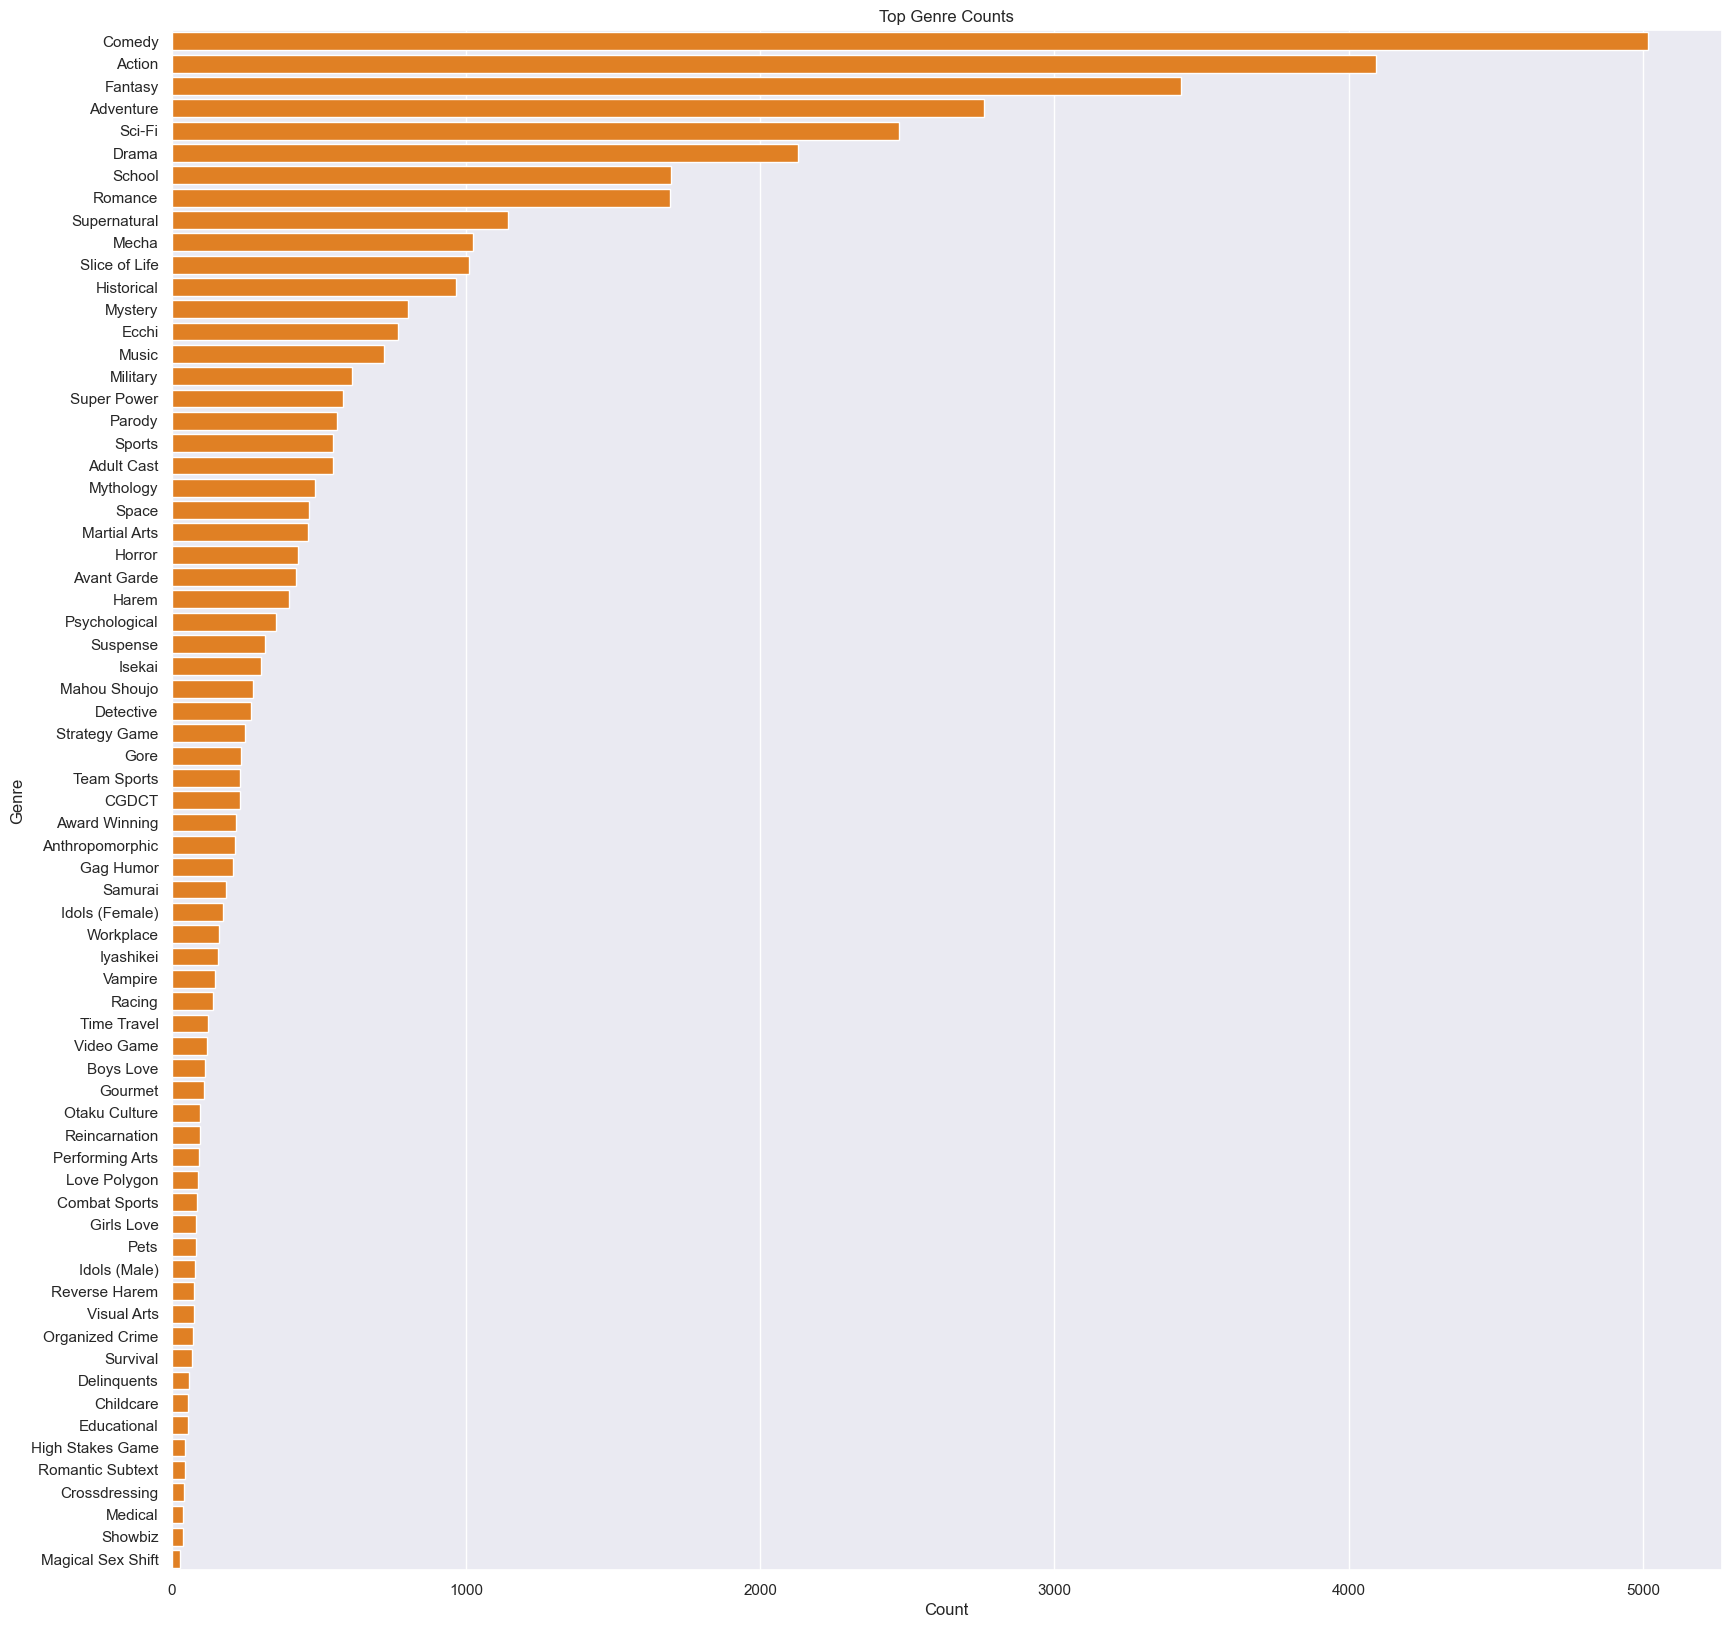

In [155]:
# Initialize a dictionary to count genres
genre_counts = {}

# Loop through each row in the DataFrame
for genres in anime_clean['final_genres']:
    # Split the genres string into a list
    genres_list = genres.split(',')
    # Increment the count for each genre
    for genre in genres_list:
        if genre in genre_counts:
            genre_counts[genre] += 1
        else:
            genre_counts[genre] = 1

# convert dict to df foreasier sorting
genre_counts_df = pd.DataFrame(list(genre_counts.items()), columns=['Genre', 'Count'])

# Sort the genre count in descending order
genre_counts_df = genre_counts_df.sort_values(by='Count', ascending=False)

# Set the figure size
plt.figure(figsize=(20, 20))
sb.barplot(x='Count', y='Genre', data=genre_counts_df, color='#FF7F05').set(title="Top Genre Counts");
plt.show()  

From this we can see that top 5 most common genres is Comedy, Action, Fantasy, Adventure, Sci-Fi and Drama respectively

### Top Anime Genres (First Tag)

In [156]:
anime_genre = anime_clean.final_genres

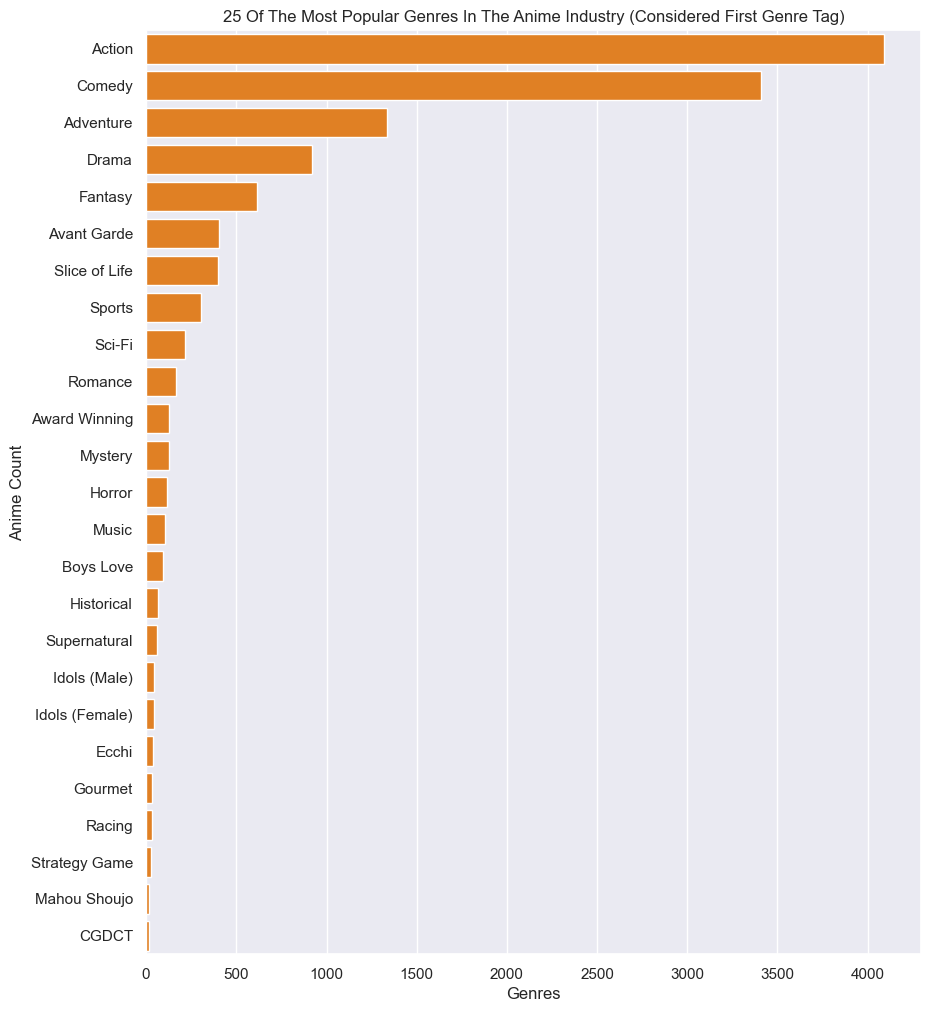

In [157]:
genre_firsts = []

for i in anime_genre.index:
    genre_firsts.append(anime_genre[i].split(",")[0])

anime_genres_firsts = pd.Series(genre_firsts).value_counts()   

plt.figure(figsize=(10,12))
sb.barplot(x=anime_genres_firsts[0:25].tolist(), y=anime_genres_firsts[0:25].index.tolist(), color='#FF7F05')
plt.xlabel('Genres')
plt.ylabel('Anime Count')
plt.title('25 Of The Most Popular Genres In The Anime Industry (Considered First Genre Tag)') 
plt.show()


### Multi-Label Tag with Comedy

In [158]:
genres_with_comedy = []

for i in anime_genre.index:
    if anime_genre[i].find('Comedy') > -1:
        for j in anime_genre[i].split(", "):
            if j != 'Comedy':
                genres_with_comedy.append(j)   


genres_with_comedy_count = pd.Series(genres_with_comedy).value_counts().head(10)   

fig = {
  "data": [
    {
      "values": genres_with_comedy_count.tolist(),
      "labels": genres_with_comedy_count.index.tolist(),
      "domain": {"x": [0, .8]},
      "name": "Number Of Students Rates",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    },],
  "layout": {
        "title":"Top 10 Multi-label Tags With Comedy"
    }
}
iplot(fig)    

### Genres Trend From 1980 to 2024

In [159]:
#import time_series dataset
genre_ts = pd.read_csv("data/genre_time_series.csv")
genre_ts.head()

,year_month,Action,Adult Cast,Adventure,Anthropomorphic,Avant Garde,Award Winning,Boys Love,CGDCT,Childcare,Combat Sports,Comedy,Crossdressing,Delinquents,Detective,Drama,Ecchi,Educational,Fantasy,Gag Humor,Girls Love,Gore,Gourmet,Harem,High Stakes Game,Historical,Horror,Idols (Female),Idols (Male),Isekai,Iyashikei,Love Polygon,Magical Sex Shift,Mahou Shoujo,Martial Arts,Mecha,Medical,Military,Music,Mystery,Mythology,Organized Crime,Otaku Culture,Parody,Performing Arts,Pets,Psychological,Racing,Reincarnation,Reverse Harem,Romance,Romantic Subtext,Samurai,School,Sci-Fi,Showbiz,Slice of Life,Space,Sports,Strategy Game,Super Power,Supernatural,Survival,Suspense,Team Sports,Time Travel,Vampire,Video Game,Visual Arts,Workplace
0,1980-01,2,0,8,0,2,1,0,0,0,0,5,0,0,0,1,0,0,3,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,4,0,1,2,0,0,0,1,0,0,0,0,0,0,0,0
1,1980-02,1,0,1,0,0,0,0,0,0,0,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,1980-03,1,0,3,0,0,0,0,0,0,1,1,0,0,0,5,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,0,3,1,0,0,0,0,0,0,1,0,0,0,0
3,1980-04,2,0,3,0,0,0,0,0,0,0,1,0,0,0,2,1,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,3,0,0,2,2,0,0,0,0,0,1,0,0,0,0,0
4,1980-05,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0


We will be excluding 2024, because the year has not end yet and the visualisation will be inaccurate because all will have a decreasing trend since there is too little anime that came out as of 2024 now.

In [160]:
#function to plot trend graph
def plot_trend_graph(ts_data, end_year, colors, name, num_cols=5):
    # Make sure 'year_month' is set as the index and convert to PeriodIndex
    ts_data['year_month'] = pd.to_datetime(ts_data['year_month'])
    ts_data.set_index('year_month', inplace=True)

    # Resample by year and sum
    ts_annual = ts_data.resample('Y').sum()
   
    # Filter the DataFrame to exclude data beyond end_year
    ts_filtered = ts_annual[ts_annual.index.year < end_year]

    # Set up subplots
    num_sources = len(ts_filtered.columns)
    num_rows = max((num_sources // num_cols) + (num_sources % num_cols > 0), 1)

    # Initialize the subplot grid and set the theme
    sb.set_theme()
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 3), sharey=True)
    fig.suptitle(f'{name} Trend from 1980 to {end_year - 1}', fontsize=24)

    # Flatten the axes array safely
    axs = axs.ravel() if num_rows * num_cols > 1 else [axs]

    # Iterate through each source and its respective axis
    for idx, source in enumerate(ts_filtered.columns):
        if idx < len(axs):
            ax = axs[idx]
            ax.plot(ts_filtered.index, ts_filtered[source], label=source, color=colors[idx % len(colors)])
            ax.set_title(source, color=colors[idx % len(colors)])
            # Set x-ticks to show every 5 years
            ticks_to_use = ts_filtered.index[::5]
            ax.set_xticks(ticks_to_use)
            ax.set_xticklabels([t.strftime('%Y') for t in ticks_to_use], rotation=45)
            ax.legend()

    # Hide unused axes if the number of sources is less than the number of subplots
    for idx in range(num_sources, num_rows * num_cols):
        axs[idx].set_visible(False)

    # Adjust layout
    plt.tight_layout()
    plt.subplots_adjust(top=0.93)  # Adjust top to prevent suptitle cut-off
    plt.show()

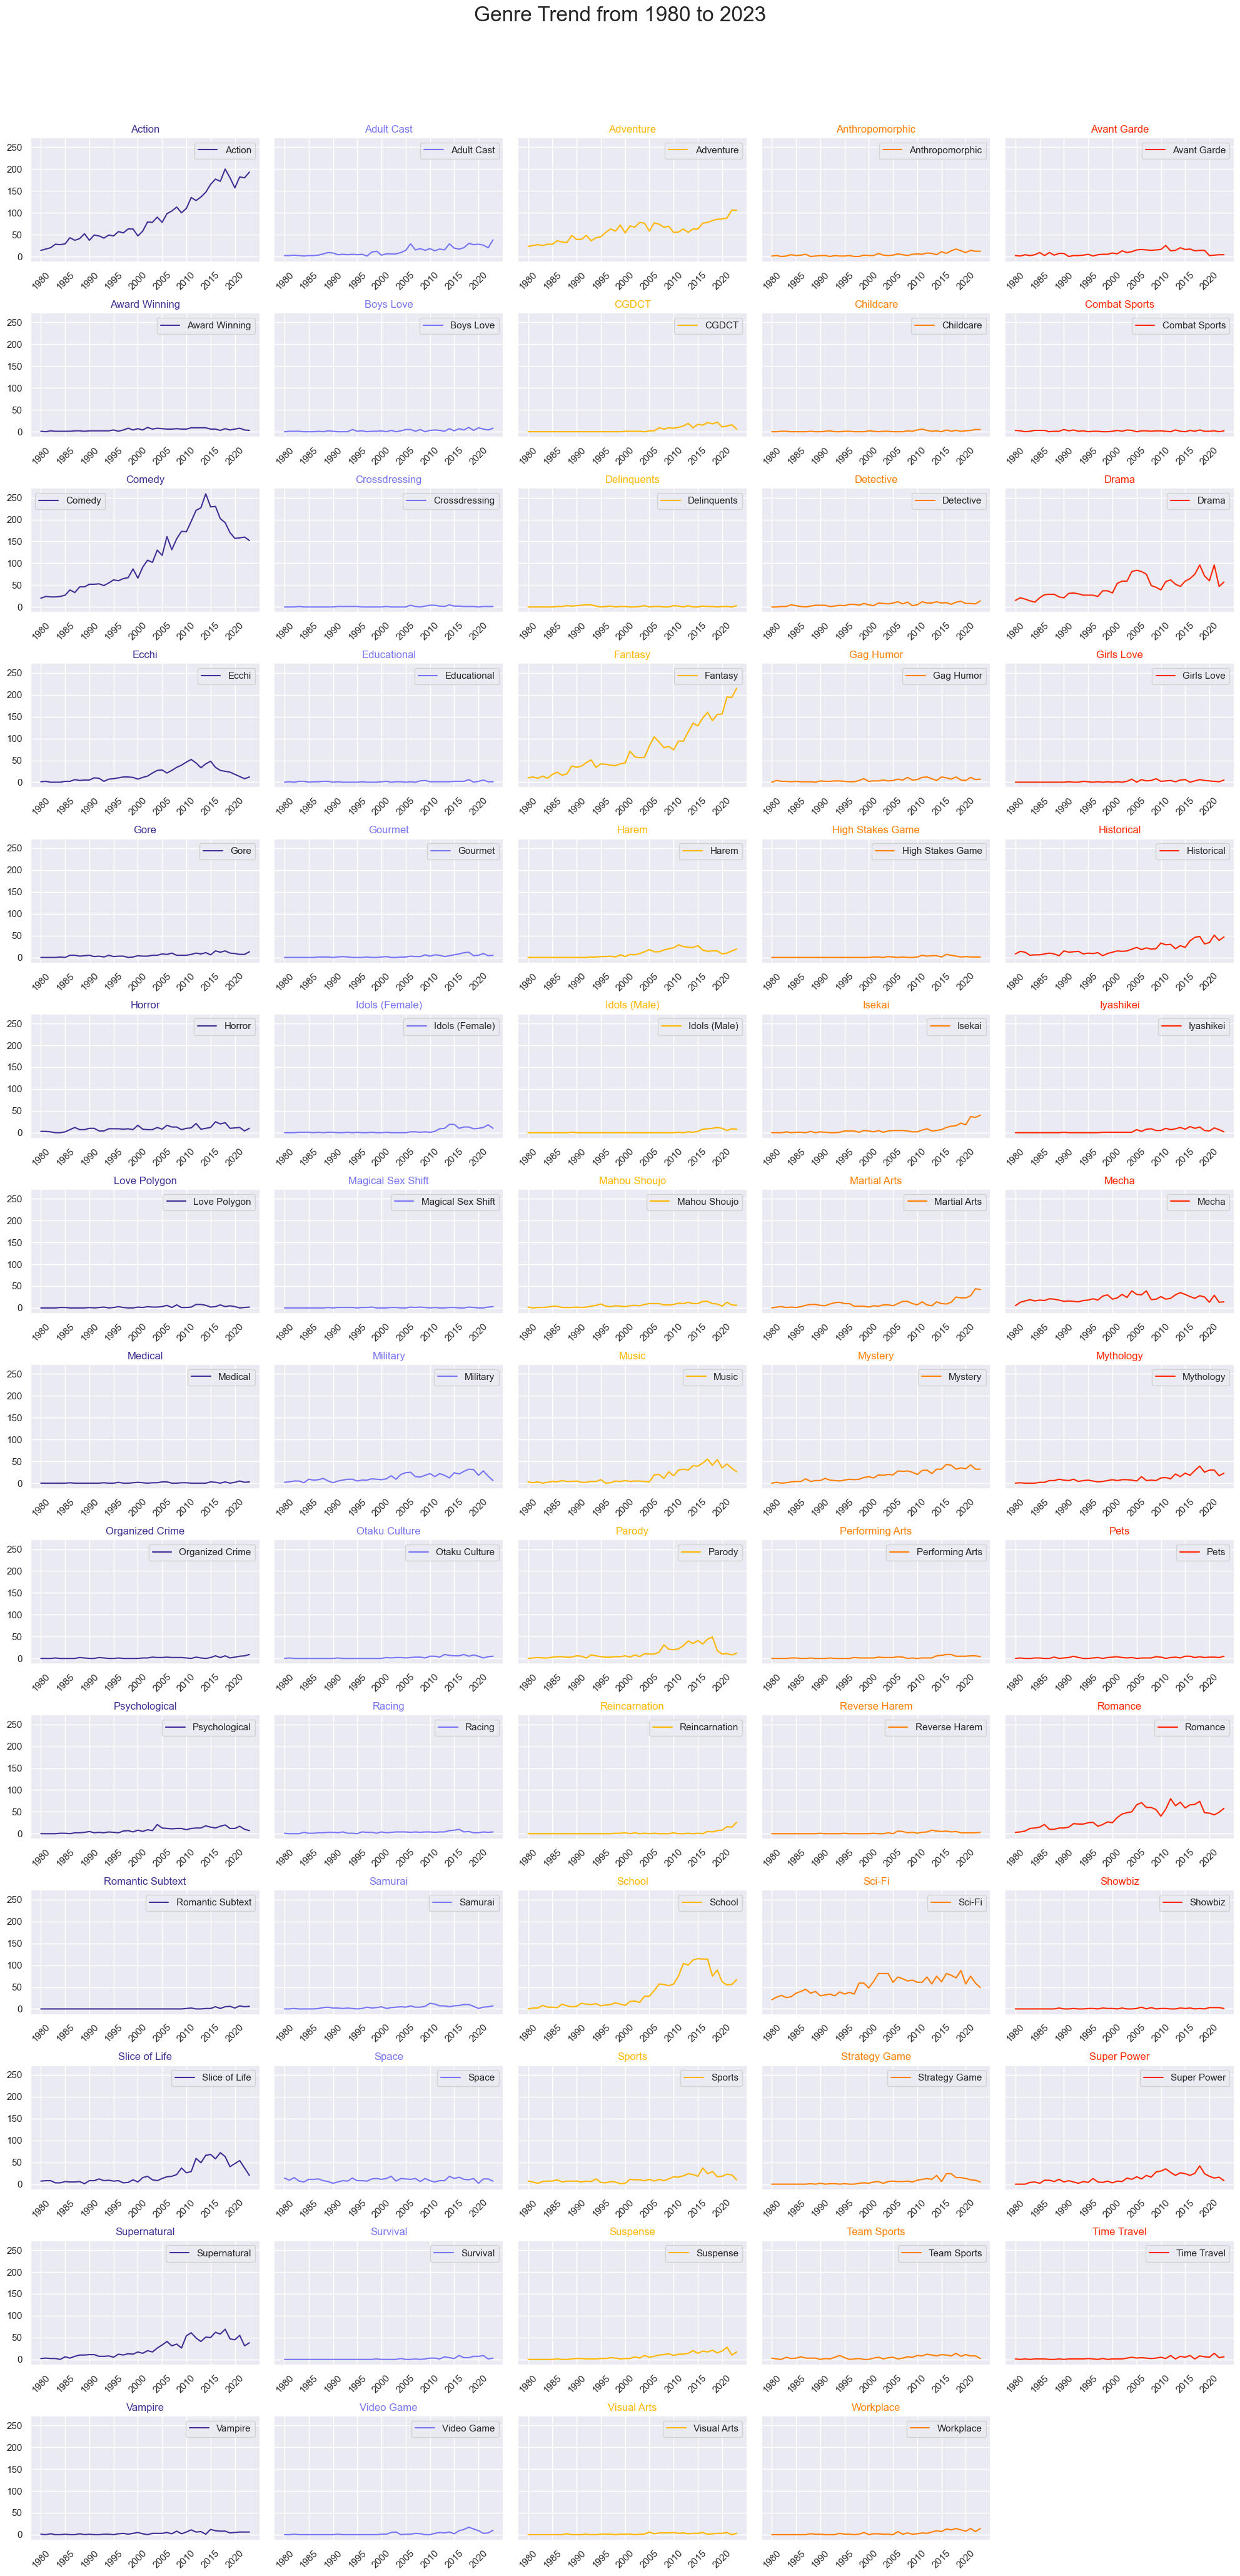

In [161]:
# plot the genre trend graph
genre_colors = ['#412F95', '#7875F4', '#FFB601', '#FF7F05', '#FF2600']
plot_trend_graph(genre_ts, 2024, genre_colors, "Genre")

**Analysis of Genre Trend:**

Our analysis revealed distinct trends in the popularity of various genres over recent years:

- **Increasing Trends:** Genres such as Action, Adventure, Fantasy, Historical, Isekai, Martial Arts, Romance, and Reincarnation have shown clear upward trends, indicating a growing interest in these themes.
Stable Trends: Other genres, have demonstrated more stable trends. This stability suggests a consistent level of interest over the years, without significant peaks or troughs.
- **Decreasing Trends by Genre:**
Comedy, Iyashikei, Military, Music, Parody, Slice of Life, Super Power, Sci-Fi, Sports: These genres have decreasd in their popularity in recent years, might be due to decreasing interest
- **Special Mention - Action & Fantasy Genre:**
Among all genres analyzed, the Action and Fantasy genre deserves special mention. It has shown a remarkable upward trend. This continuous increase suggests an enduring appeal that resonates across diverse audiences, making it a cornerstone of content production. 
- **Special Mention - Comedy Genre:**
Comedy genre had been in an increasy trend from 1980s to 2010s aroudn there, but after 2010s it show a continuous decreasing trend in it

This graph help us understadn the evolving preferences of viewers and can guide producers and broadcasters in making informed decisions about future productions.

# 2. Studio

### Top Count of Studio for Anime

In [162]:
anime_clean.studios.unique()

array(['Sunrise', 'Bones', 'Madhouse', ..., 'Wolfsbane,BloomZ',
       'YURUPPE Inc.,CHOCOLATE', 'Gear Studio'], dtype=object)

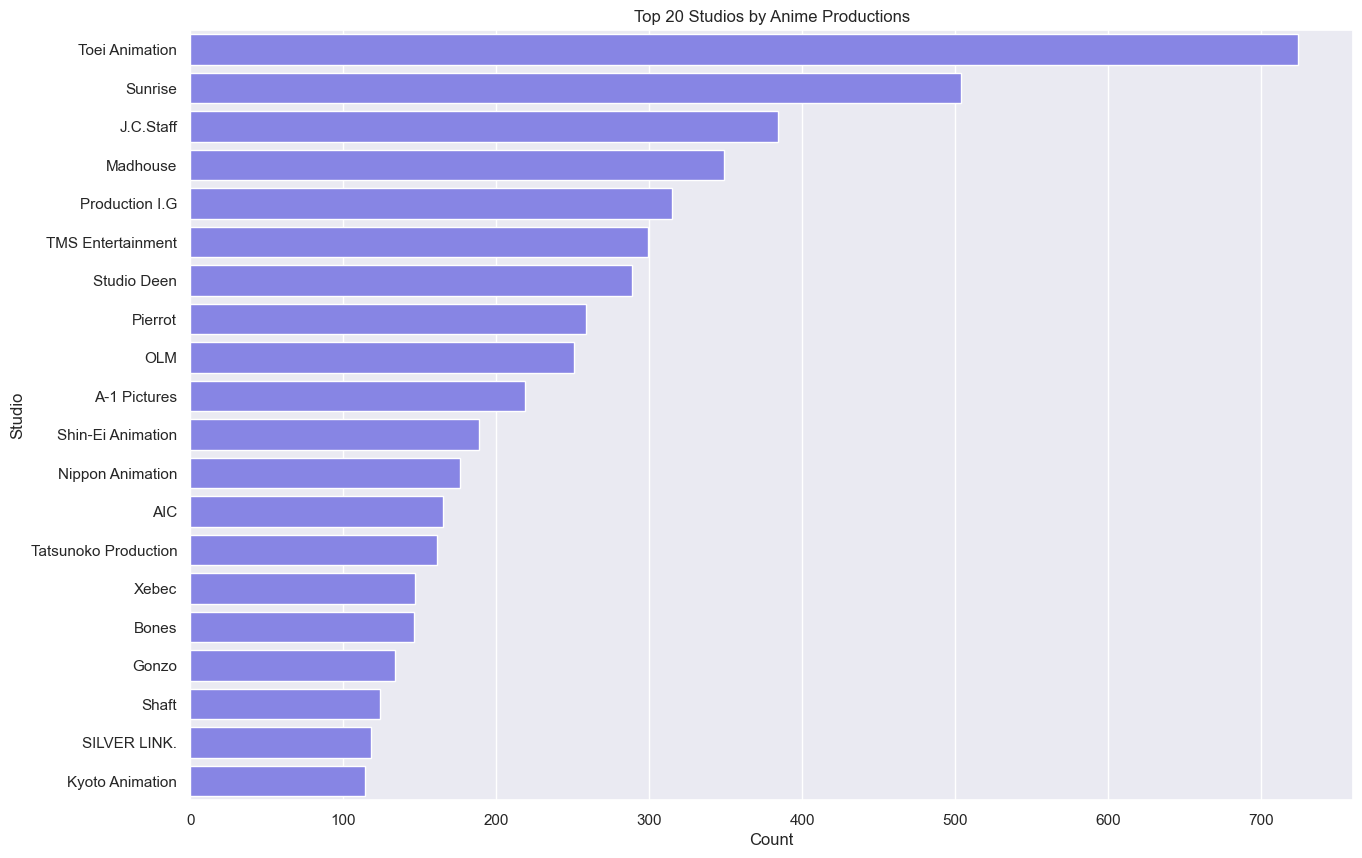

In [164]:
#we will exclude no stuidios for now
studio_anime = anime_clean[anime_clean['studios'] != 'no_studios']

# Initialize a dictionary to count studios
studio_counts = {}

# Loop through each row in the DataFrame
for studios in studio_anime['studios']:
    # Split the studios string into a list
    studios_list = studios.split(',')
    # Increment the count for each studio
    for studio in studios_list:
        if studio in studio_counts:
            studio_counts[studio] += 1
        else:
            studio_counts[studio] = 1

# Convert dictionary to DataFrame for easier sorting
studio_counts_df = pd.DataFrame(list(studio_counts.items()), columns=['Studio', 'Count'])

# Sort the studio count in descending order
studio_counts_df = studio_counts_df.sort_values(by='Count', ascending=False)

# Set the figure size and plot
plt.figure(figsize=(15, 10))  # Adjusted for better visibility of top 20 studios
sb.barplot(x='Count', y='Studio', data=studio_counts_df.head(20), color='#7875F4').set(title="Top 20 Studios by Anime Productions")
plt.show()


**Analysis:**

We can see that the studios to had the top 5 studios which has the most anime produces is **Toei Animation**, followed by Sunrise, J.C. Staff, Madhouse, Production I.G

### Studio vs Mean Score

In [180]:
# function to plot boxplot to see the distribution
def plot_boxplot_graph(dataset, feature, compare_feature, feature_name, compare_name, color='blue', top_num=None):

    # Set the figure size
    plt.figure(figsize=(15, 8))
    
    # If top_num is not None, slice the dataset to include only the top_num entries
    if top_num is not None:
        dataset = dataset.head(top_num)
    
    # Plot the graph
    sb.boxplot(data=dataset, x=compare_feature, y=feature, orient='h', color=color).set(title=f"{feature_name} vs {compare_name}")
    
    plt.show()

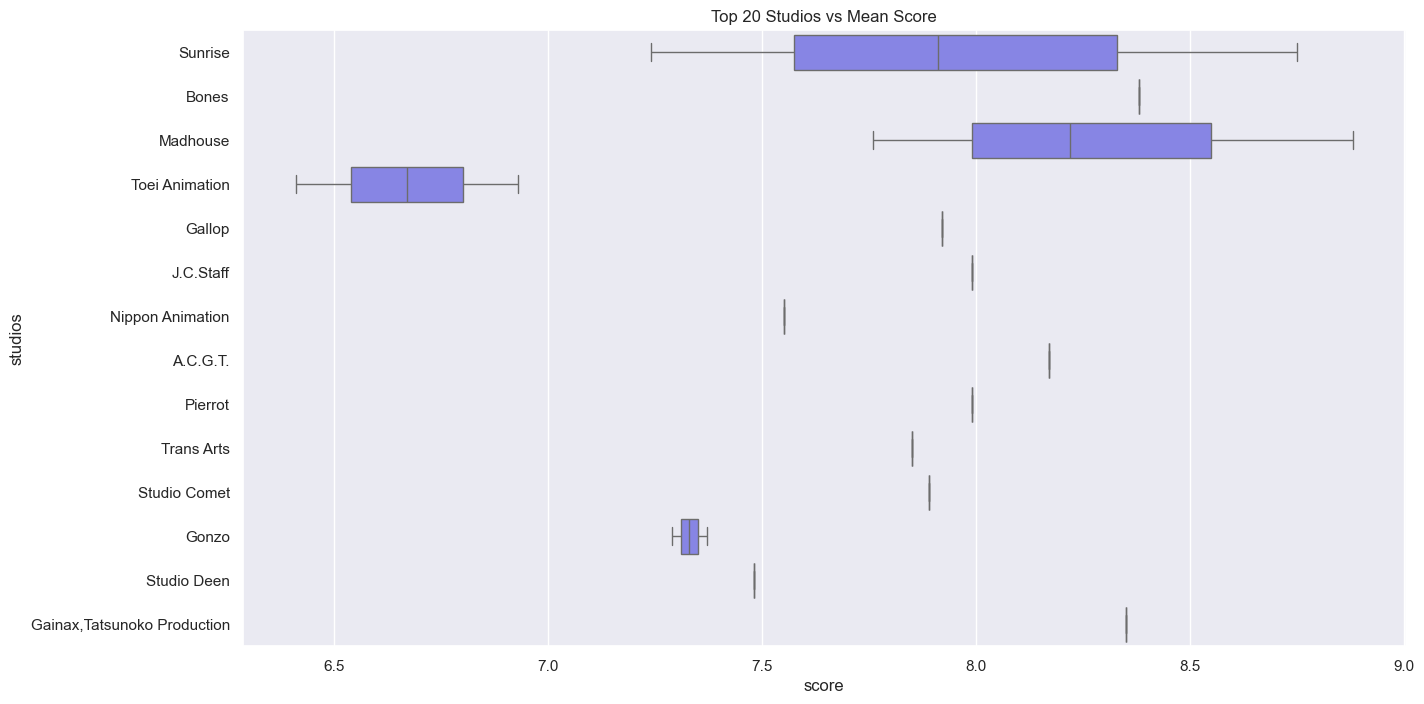

In [181]:
#plot the top 20 studios against mean score to see it distribution
plot_boxplot_graph(studio_anime, 'studios', 'score', "Top 20 Studios", "Mean Score", "#7875F4", 20)

**Analysis:**

# 3. Source

In addition to original works, anime are often adaptations of Japanese comics (manga), light novels, or video games, which are called source of the anime

In [ ]:
#show the list of anime source
source_df = pd.DataFrame(anime_clean['source'].unique())
source_df

,0
0,Original
1,Manga
2,Light novel
3,Game
4,Visual novel
5,4-koma manga
6,Novel
7,Other
8,Unknown
9,Picture book


### Count of Source

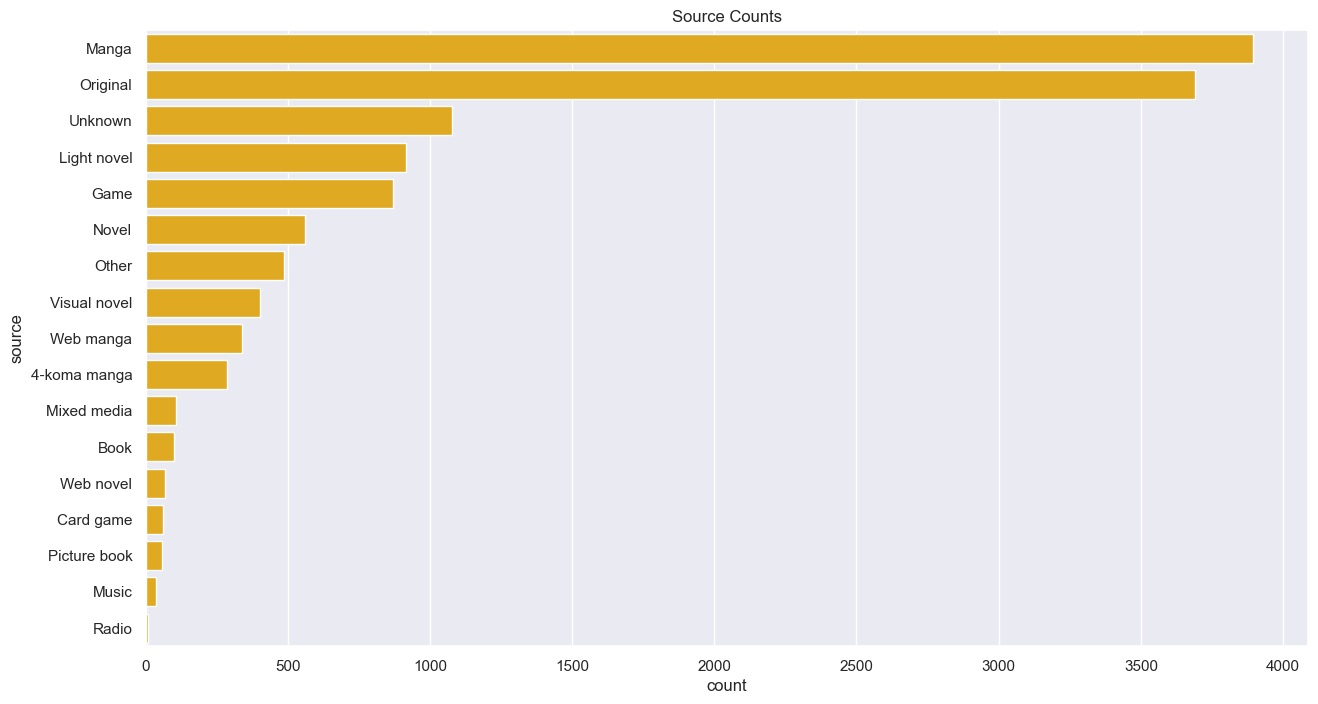

In [ ]:
# Set the figure size
plt.figure(figsize=(15, 8))

#plot the graph
sb.barplot(data=anime_clean['source'].value_counts(), orient = 'h', color='#FFB601').set(title="Source Counts");
plt.show()

We can see that the most of the anime is originated from either manga, original works, unknown or light novel

### Source vs Score 

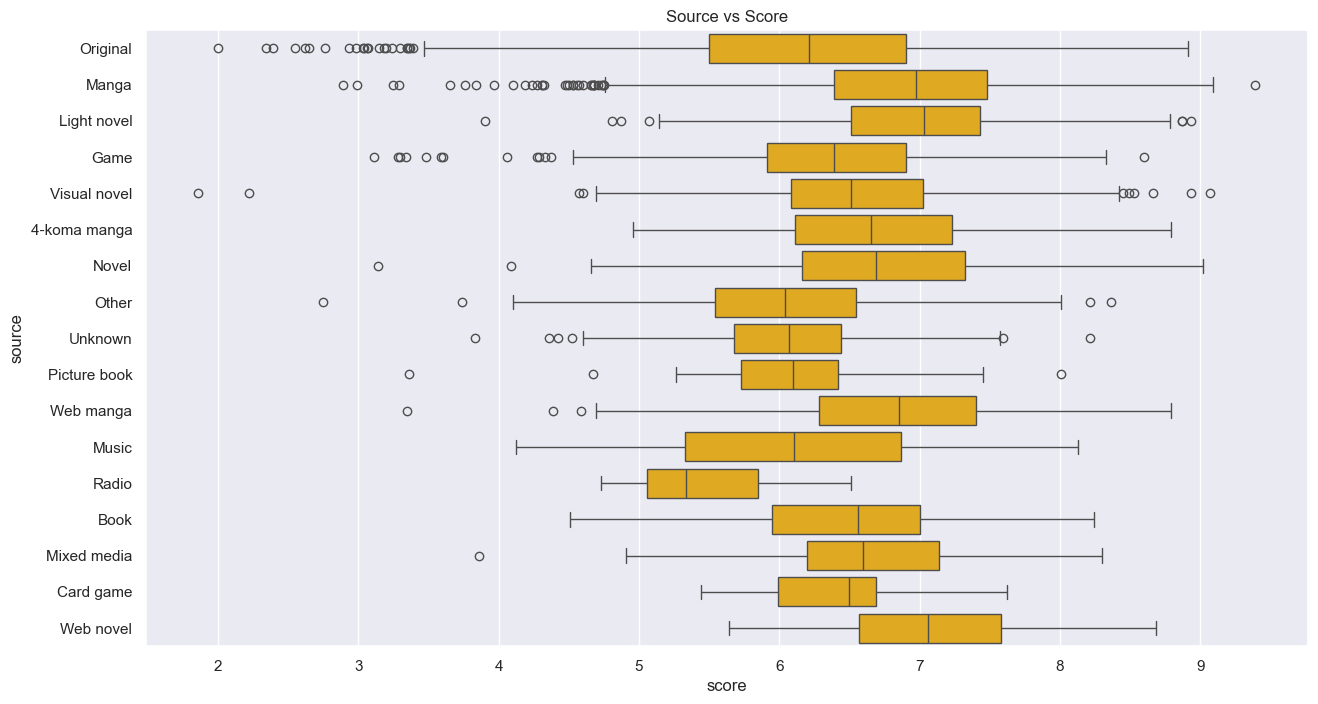

In [182]:
#plot the source vs mean score box plot
plot_boxplot_graph(anime_clean, 'source', 'score', "Source", "Mean Score", "#FFB601")

**From the graph:**

- Anime from sources like "Original" and "Manga" tend to have a higher median score, and also show a large spread of scores (wider boxes), indicating more variability.
- Sources like "Web manga" and "Card game" have a narrower IQR, suggesting that the scores are more consistent (less variability).
- There are several outliers for many sources, indicated by the dots outside the whiskers. These outliers are scores that are unusually high or low compared to the rest of the data for that source.
- It’s worth noting that "Mixed media" and "Web novel" categories at the bottom have their boxplot components very close together or collapsed, which suggests limited data or low variability in scores.

Overall, the boxplot can provide a lot of information about the distribution and central tendency of scores across different sources of anime.

### Source Trend Over The Years (1980 - 2023)

In [ ]:
#import time_series dataset
source_ts = pd.read_csv("data/source_time_series.csv")
source_ts.head()

,year_month,4-koma manga,Book,Card game,Game,Light novel,Manga,Mixed media,Music,Novel,Original,Other,Picture book,Radio,Unknown,Visual novel,Web manga,Web novel
0,1980-01,0,1,0,0,0,1,0,0,1,5,1,0,0,9,0,0,0
1,1980-02,0,0,0,0,0,0,0,0,0,2,0,0,0,2,0,0,0
2,1980-03,0,1,0,0,0,4,0,0,1,1,0,0,0,1,0,0,0
3,1980-04,0,0,0,0,0,4,0,0,0,1,1,0,0,2,0,0,0
4,1980-05,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0


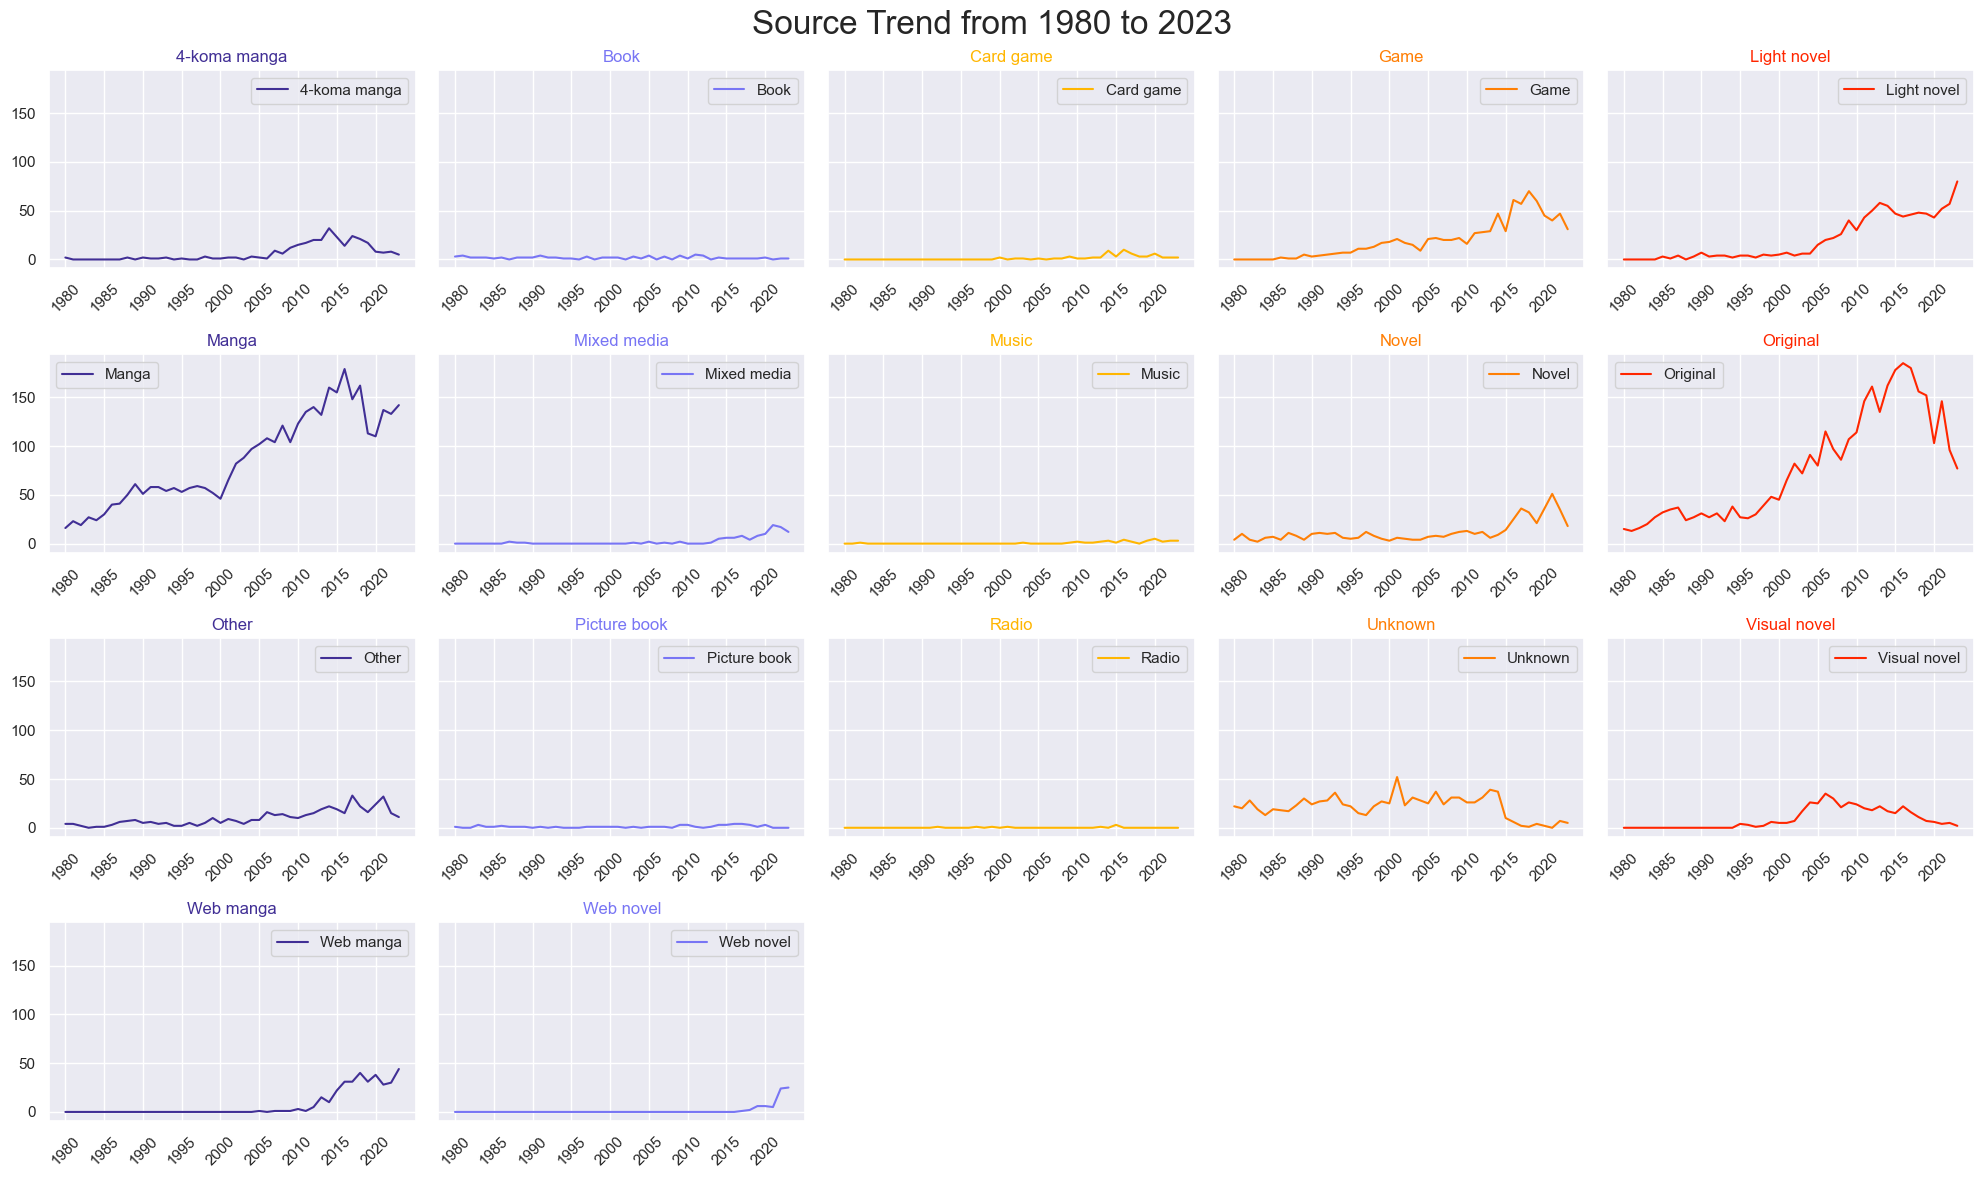

In [ ]:
#plot the trend graph for source trend over the years
source_colors = ['#412F95', '#7875F4', '#FFB601', '#FF7F05', '#FF2600']
plot_trend_graph(source_ts, 2024, source_colors, "Source")

**Analysis:**

The graph appears to show the trend of different anime sources from 1980 to 2023. Here are some insightful findings from the visual representation:

- **Rise of Light Novels:** There's a clear upward trend in anime adaptations from light novels, especially noticeable from the early 2000s onwards. This may indicate an increased popularity or marketability of stories from this medium.
Original Content Fluctuation: Anime based on original content shows fluctuation with a peak around the late 2000s followed by a significant rise in the 2010s and a drop or normalization afterwards. This could reflect industry investment cycles or changing viewer preferences over time.
- **Web Novels Gaining Ground:** Although starting from a lower count, web novel adaptations show a sharp increase in recent years, suggesting a new trend where online content is becoming a more prevalent source for anime, possibly due to the ease of access to web content for both creators and viewers.
- **Stable Yet Lower Counts:** Several sources, such as 'Book', 'Card Game', 'Picture Book', and 'Radio', have maintained a relatively low but stable output over the analyzed period, which could indicate a consistent niche audience for these adaptations.
- **The Decline in Some Sources:** Certain sources like 'Music' and 'Radio' have a very low count of adaptations, which might suggest they are less popular or less conducive to anime adaptation.
- **Web Manga Increase:** There's an increasing trend for anime adaptations from web manga starting in the late 2000s, which continues to rise. This reflects the changing landscape of manga consumption, where digital formats are becoming more prevalent.
- **Visual Novels' Decline:** Visual novels had a peak around the mid-2010s but have seen a decline since. This could be due to a shift in the gaming industry or changing tastes among the anime-viewing audience.
- **Unknown Source Variability:** The 'Unknown' category shows variability, with a notable peak and decline pattern, suggesting there may be data inconsistencies, changes in data recording practices, or varying levels of detail in the source material documentation over the years.

# 4. Media Type

In [ ]:
#show the list of anime source
media_df = pd.DataFrame(anime_clean['type'].unique())
media_df

,0
0,TV
1,Movie
2,OVA
3,TV Special
4,Special
5,ONA


### Media Type Top count

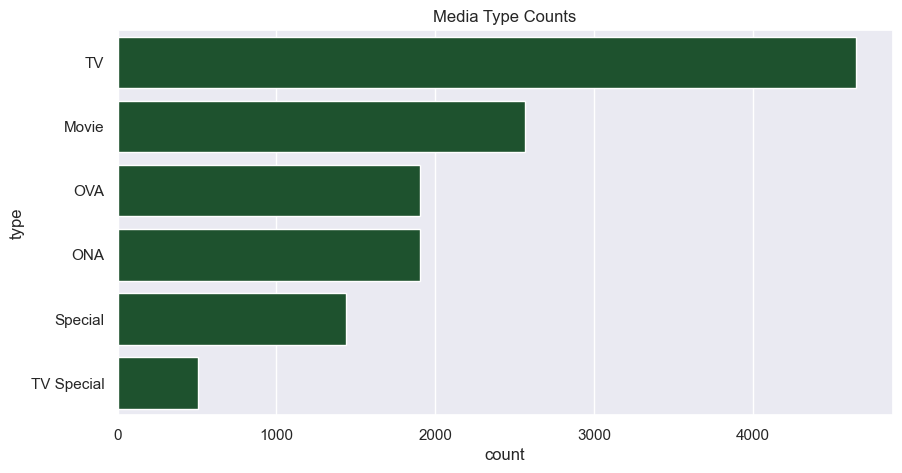

In [170]:
# Set the figure size
plt.figure(figsize=(10, 5))

#plot the graph
sb.barplot(data=anime_clean['type'].value_counts(), orient = 'h', color='#165A2B').set(title="Media Type Counts");
plt.show()

**Analysis:**

This bar chart depicts a count of anime productions classified by media type. The x-axis represents the count of productions, and the y-axis lists different types of media.

From the chart, we can deduce the following:

- **TV Dominates:** Television series have the highest count, which indicates that TV is the most common format for anime. This could be due to the broad accessibility and serialized nature of TV, which suits anime production well.
Movies are Popular: Anime movies are also a significant category, suggesting that there's a robust market for anime in cinema or standalone releases.
- **OVAs and ONAs:** Original Video Animations (OVAs) and Original Net Animations (ONAs) have a considerable count, pointing to alternative distribution methods being quite popular. OVAs are traditionally released directly to the consumer market without theatrical or TV broadcast, and ONAs are distributed via the internet.
- **Specials and TV Specials:** These categories have lower counts compared to other media types. Specials might be occasional episodes or bonus content, and they are less frequently produced than main series or movies.

### Media Type vs Score

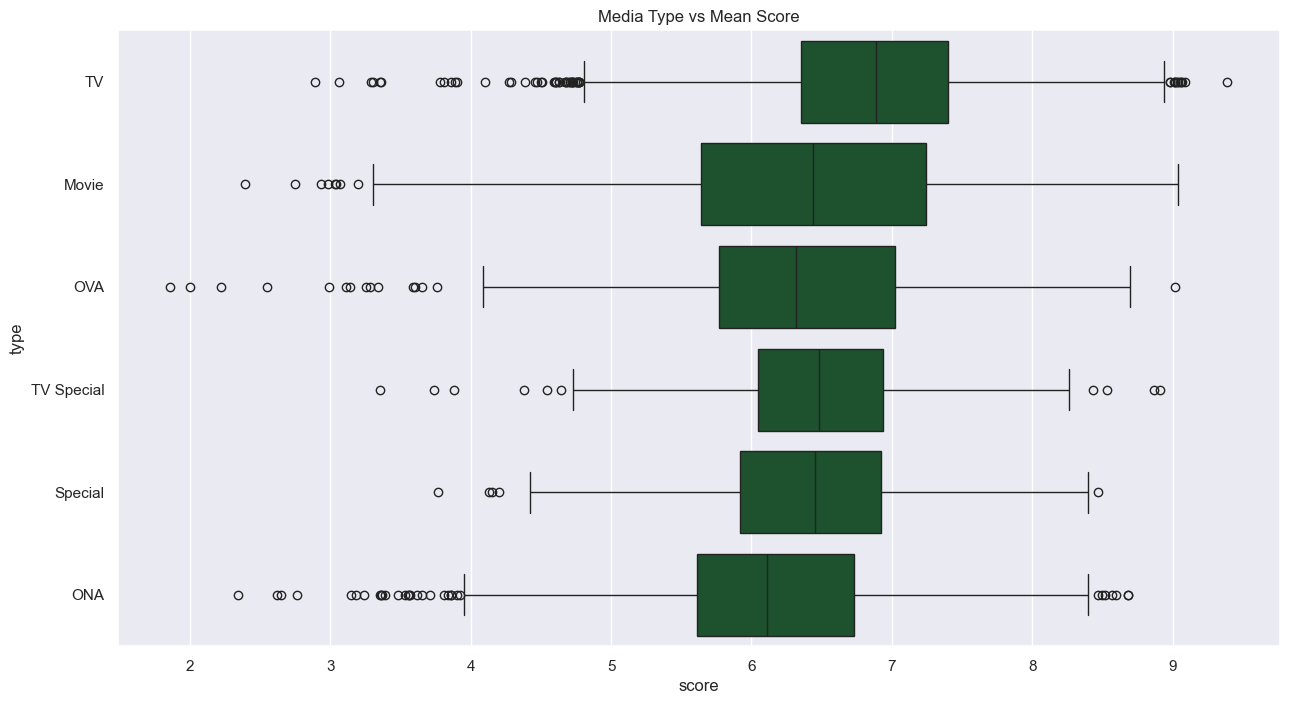

In [185]:
#plot the media type vs score graph
plot_boxplot_graph(anime_clean, "type", "score", "Media Type", "Mean Score", "#165A2B")

**Analysis:**
Observations from the graph could include:

- The median scores for TV, OVA, and TV Special are higher than for Movie, Special, and ONA.
- TV shows have the widest IQR, indicating a more significant variability in scores.
- There are a substantial number of outliers for all media types, especially for TV shows, which have outliers on both the lower and upper ends.
- Movies, OVAs, and TV Specials appear to have less variability in their scores compared to TV shows, indicated by their shorter boxes.
The spread of scores and the position of the median can provide insights into both the central tendency and the dispersion of the scores for each media type. The presence of outliers may suggest that there are a few anime in each category that did not conform to the typical score ranges, which could be exceptionally high or low.

# 5. Season

In [ ]:
#show the list of anime source
season_df = pd.DataFrame(anime_clean['season'].unique())
season_df

,0
0,spring
1,summer
2,fall
3,winter


### Top Count of Airing Season

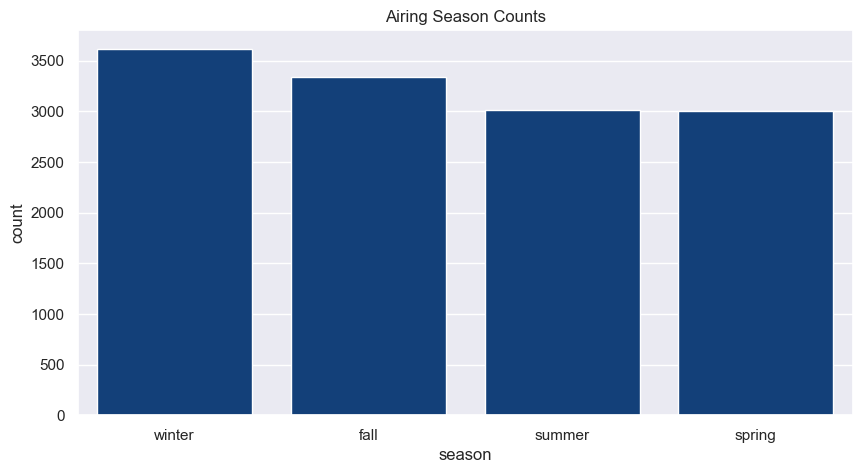

In [ ]:
# Set the figure size
plt.figure(figsize=(10, 5))

#plot the graph
sb.barplot(data=anime_clean['season'].value_counts(), color='#023e8a').set(title="Airing Season Counts");
plt.show()

### Airing Season vs Score

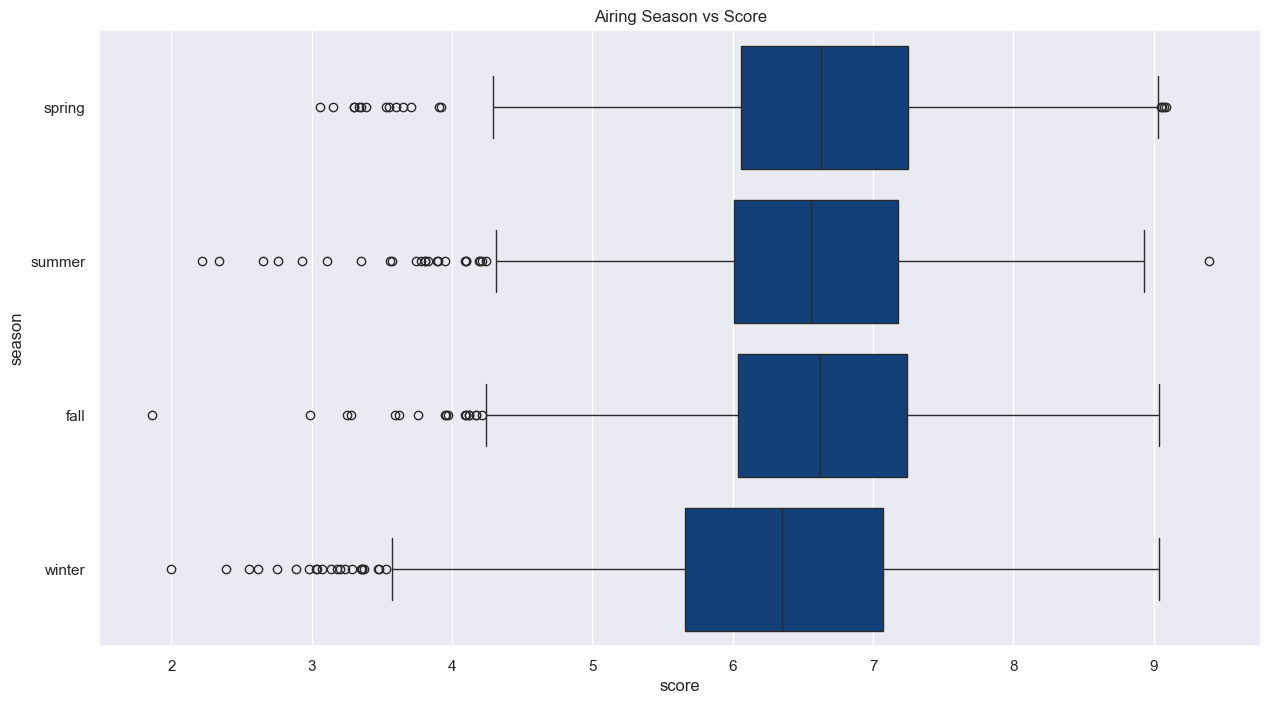

In [186]:
#plot the airing reason vs score graph
plot_boxplot_graph(anime_clean, "season", "score", "Airing Season", "Score", "#023e8a")

**Analysis:**

----------------------------------------------------------------------------**Above is analysis on each features**---------------------------------------------------------------------------

-----------------------------------------------------------------------**Below is more indepth analysis on top anime**---------------------------------------------------------------------

# 6. Top Anime (According to score and popularity)

I will be ranking out the top 100 anime and then i will drop those that are not popular, and those remaining would be the top anime

https://www.kaggle.com/code/fatihbilgin/story-of-anime

In [ ]:
anime_top_100 = anime_clean[(anime_clean.popularity != 0)].sort_values(by='rank').head(100)
popularity_and_rank_100 = anime_top_100[(anime_top_100.popularity <= 100)]

len(popularity_and_rank_100)

25

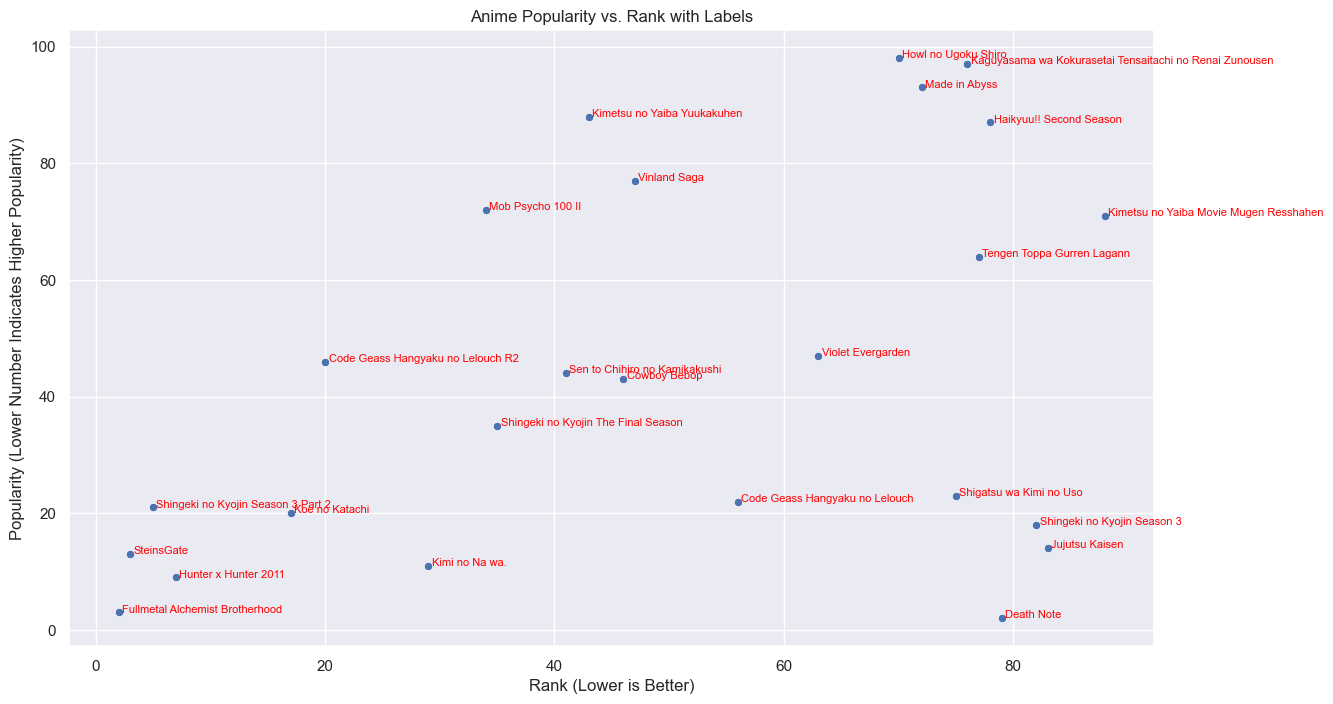

In [ ]:
plt.figure(figsize=(14, 8))  # Larger figure size to accommodate labels
ax = sb.scatterplot(x='rank', y='popularity', data=popularity_and_rank_100)


# Use iterrows to loop through DataFrame safely and add text labels
for index, row in popularity_and_rank_100.iterrows():
    plt.text(x=row['rank'] + 0.3,  # Adding a small offset to x position for readability
             y=row['popularity'],
             s=row['title_x'],
             fontdict=dict(color='red', size=8))  # Adjust size as needed for visibility

# Set the title and labels
plt.title('Anime Popularity vs. Rank with Labels')
plt.xlabel('Rank (Lower is Better)')
plt.ylabel('Popularity (Lower Number Indicates Higher Popularity)')

# Show the plot
plt.show()


We can see that **Fullmetal Alchemist Brotherhood** is one of the best anime, as it have the highest rank and highest popularity as u can see it at the bottom most left

### Studio

See which studio produce the best anime

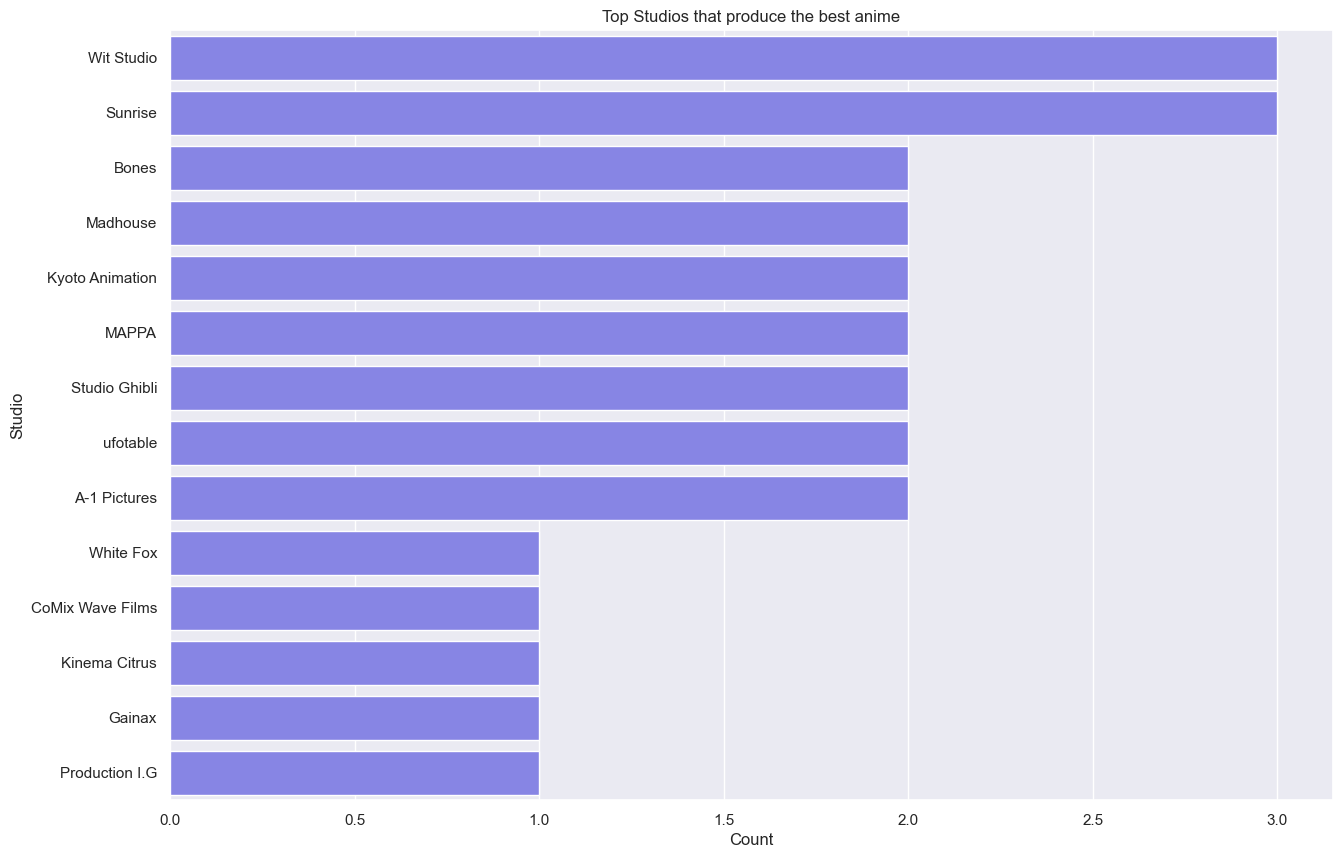

In [ ]:
# Initialize a dictionary to count studios
studio_counts = {}

# Loop through each row in the DataFrame
for studios in popularity_and_rank_100['studios']:
    # Split the studios string into a list
    studios_list = studios.split(',')
    # Increment the count for each studio
    for studio in studios_list:
        if studio in studio_counts:
            studio_counts[studio] += 1
        else:
            studio_counts[studio] = 1

# Convert dictionary to DataFrame for easier sorting
studio_top_counts_df = pd.DataFrame(list(studio_counts.items()), columns=['Studio', 'Count'])

# Sort the studio count in descending order
studio_top_counts_df = studio_top_counts_df.sort_values(by='Count', ascending=False)

# Set the figure size and plot
plt.figure(figsize=(15, 10))  # Adjusted for better visibility of top 20 studios
sb.barplot(x='Count', y='Studio', data=studio_top_counts_df.head(20), color='#7875F4').set(title="Top Studios that produce the best anime")
plt.show()


From the barplot above, it was observed that **Toei Animation**, known for its prolific output, produces the most number of anime as seen in the first part of my visualisation. However, despite this high production rate, Toei Animation does not appear prominently in the list of top anime rankings. This suggests that merely producing a large volume of anime does not guarantee that these titles will be critically successful or widely acclaimed.

In contrast, **Wit Studio**, known for a significantly lower volume of productions, has achieved remarkable success and recognition in the industry. Wit Studio's works frequently appear at the top of anime rankings, suggesting a focus on quality over quantity. This observation underscores the importance of production quality as a critical factor in achieving recognition and success in the anime market.

### **Genre**

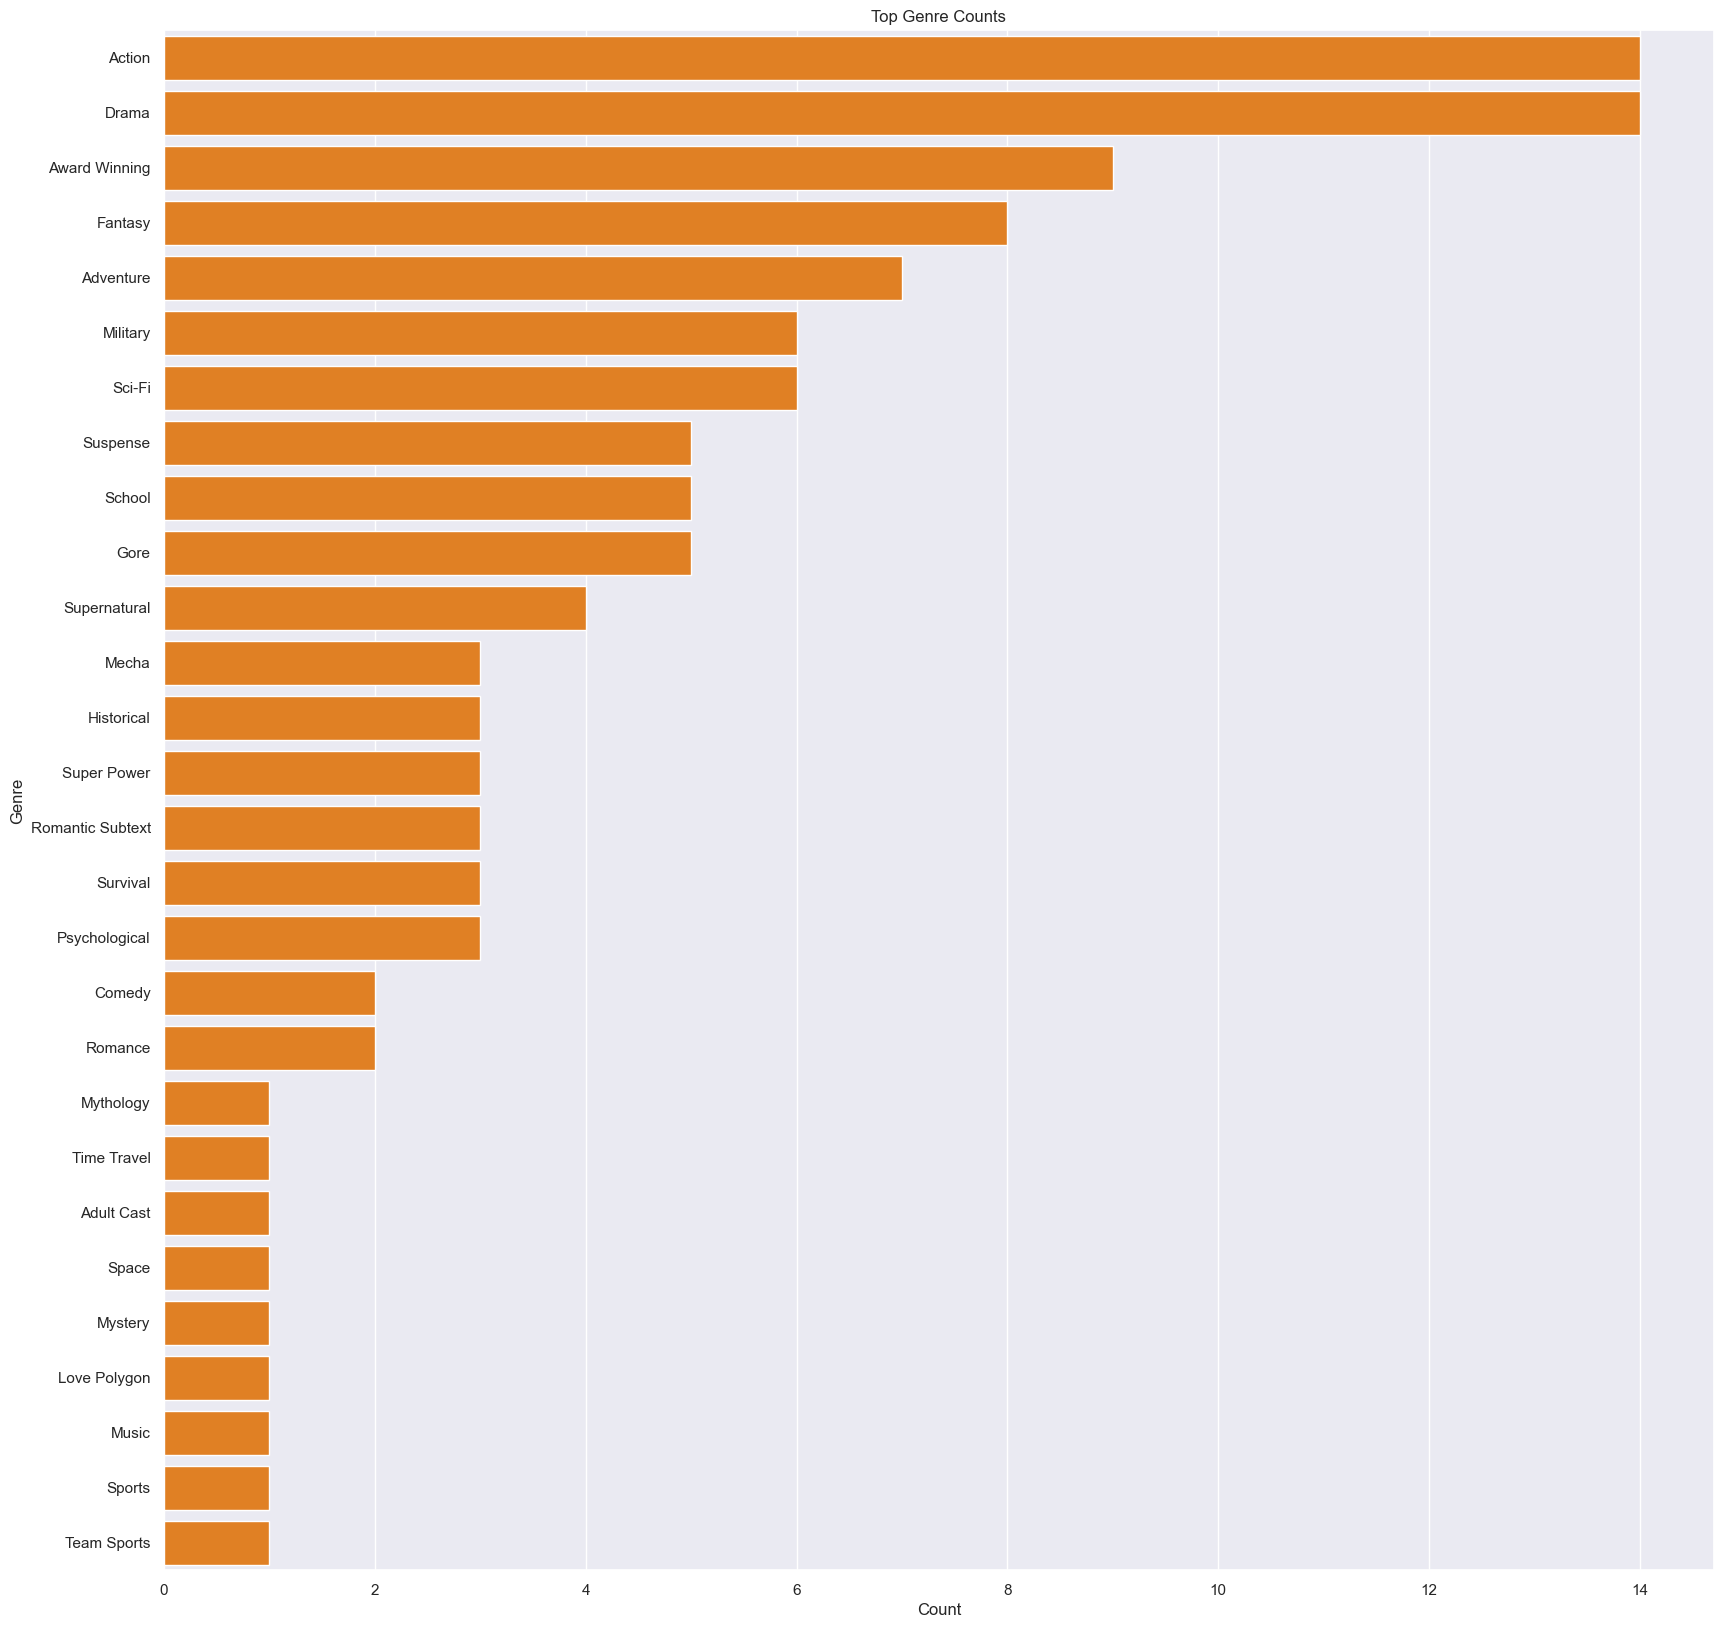

In [ ]:
# Initialize a dictionary to count genres
genre_counts = {}

# Loop through each row in the DataFrame
for genres in popularity_and_rank_100['final_genres']:
    # Split the genres string into a list
    genres_list = genres.split(',')
    # Increment the count for each genre
    for genre in genres_list:
        if genre in genre_counts:
            genre_counts[genre] += 1
        else:
            genre_counts[genre] = 1

# convert dict to df foreasier sorting
genre_top_counts_df = pd.DataFrame(list(genre_counts.items()), columns=['Genre', 'Count'])

# Sort the genre count in descending order
genre_top_counts_df = genre_top_counts_df.sort_values(by='Count', ascending=False)

# Set the figure size
plt.figure(figsize=(20, 20))
sb.barplot(x='Count', y='Genre', data=genre_top_counts_df, color='#FF7F05').set(title="Top Genre Counts");
plt.show()  

### Source

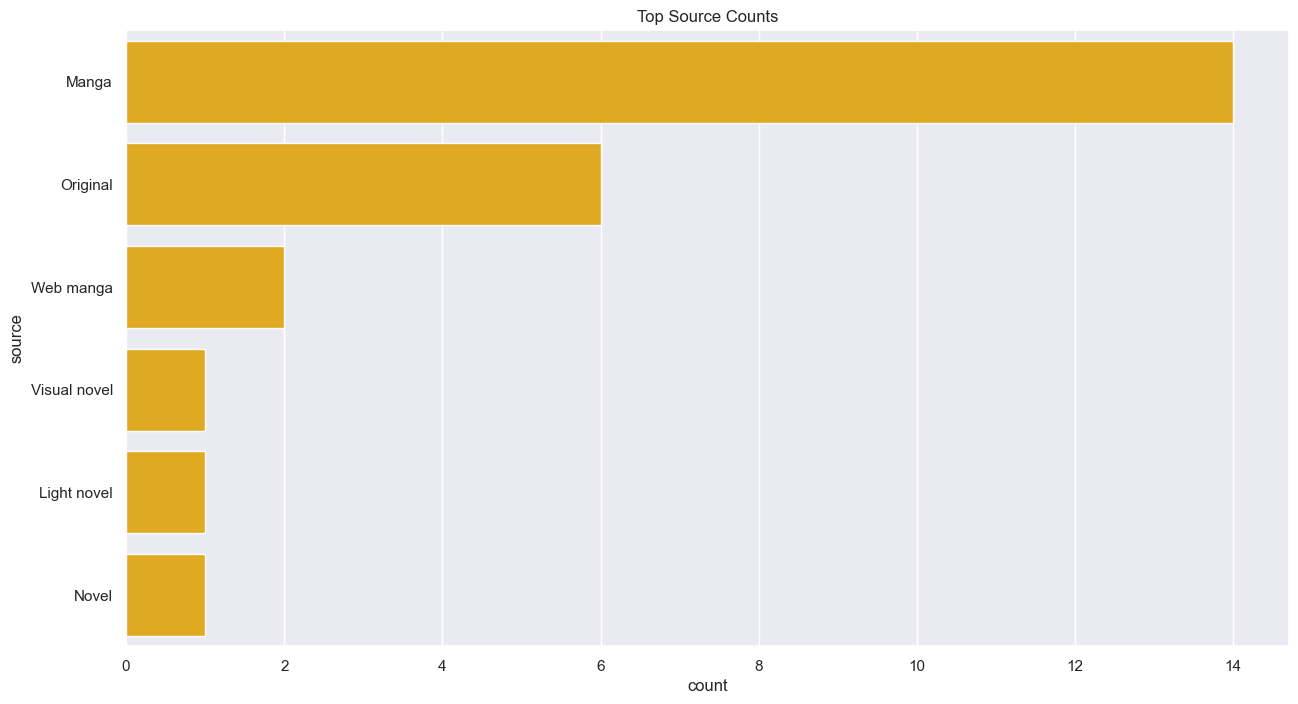

In [ ]:
# Set the figure size
plt.figure(figsize=(15, 8))

#plot the graph
sb.barplot(data=popularity_and_rank_100['source'].value_counts(), orient = 'h', color='#FFB601').set(title="Top Source Counts");
plt.show()

### Season

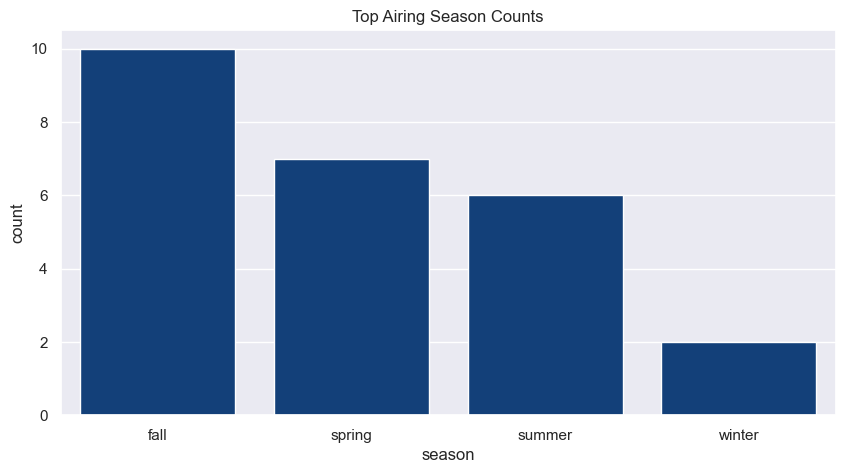

In [ ]:
# Set the figure size
plt.figure(figsize=(10, 5))

#plot the graph
sb.barplot(data=popularity_and_rank_100['season'].value_counts(), color='#023e8a').set(title="Top Airing Season Counts");
plt.show()

### Media Type

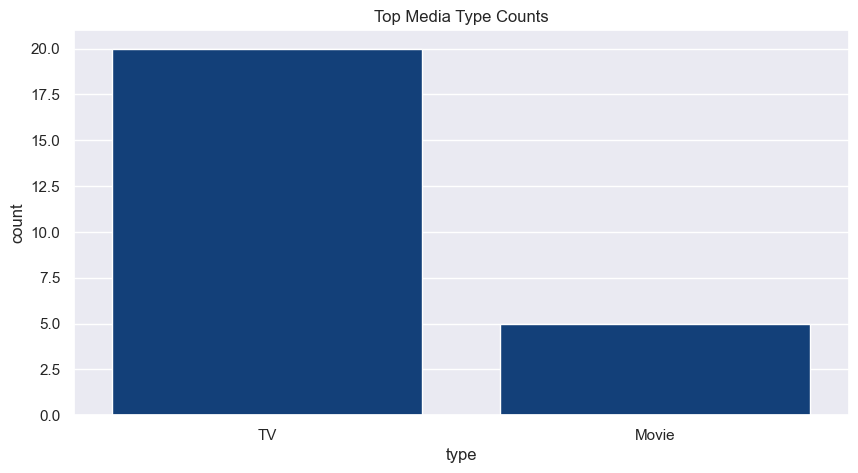

In [ ]:
# Set the figure size
plt.figure(figsize=(10, 5))

#plot the graph
sb.barplot(data=popularity_and_rank_100['type'].value_counts(), color='#023e8a').set(title="Top Media Type Counts");
plt.show()

### Synopsis

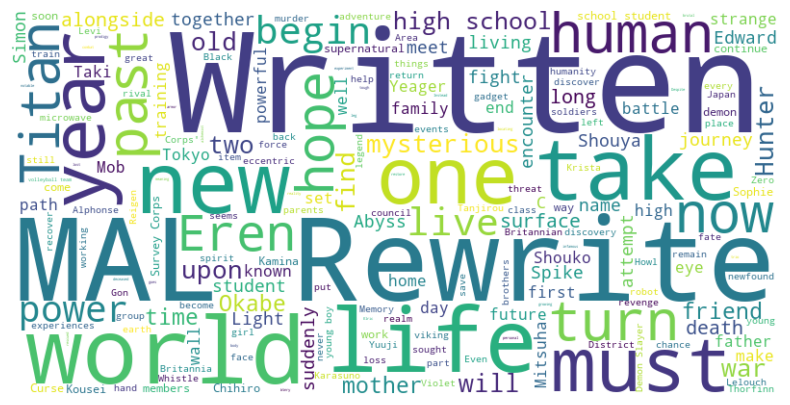

In [ ]:
# Assume 'anime_df' is your DataFrame and it contains a 'synopsis' column
# Concatenate all synopsis into a single string
text = ' '.join(synopsis for synopsis in popularity_and_rank_100['synopsis'] if isinstance(synopsis, str))

# Create a word cloud object
wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate(text)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # Don't show axes to keep it clean
plt.show()


**Analysis:** 
1. Source: top anime are usually adapted from **manga**
2. Season: top anime usually aired in **fall season**
3. Genre: top anime most popular genres are **Action** and **Drama**
4. Studio: The **Wit Studio** produce the most top anime out of all the studios
5. Media Type: The top anime are usually **TV** or **Movie**

# 7. Top 100 Most Popular Anime (Regardless of Rank)

### Most Popular vs Rank

In [ ]:
anime_most_pop = anime_clean[anime_clean.popularity!=0].sort_values(by='popularity').head(100).loc[:,['title_x','popularity','rank']]
anime_most_pop.head()

,title_x,popularity,rank
6034,Shingeki no Kyojin,1,109.0
1323,Death Note,2,79.0
3363,Fullmetal Alchemist Brotherhood,3,2.0
7787,One Punch Man,4,130.0
5398,Sword Art Online,5,3200.0


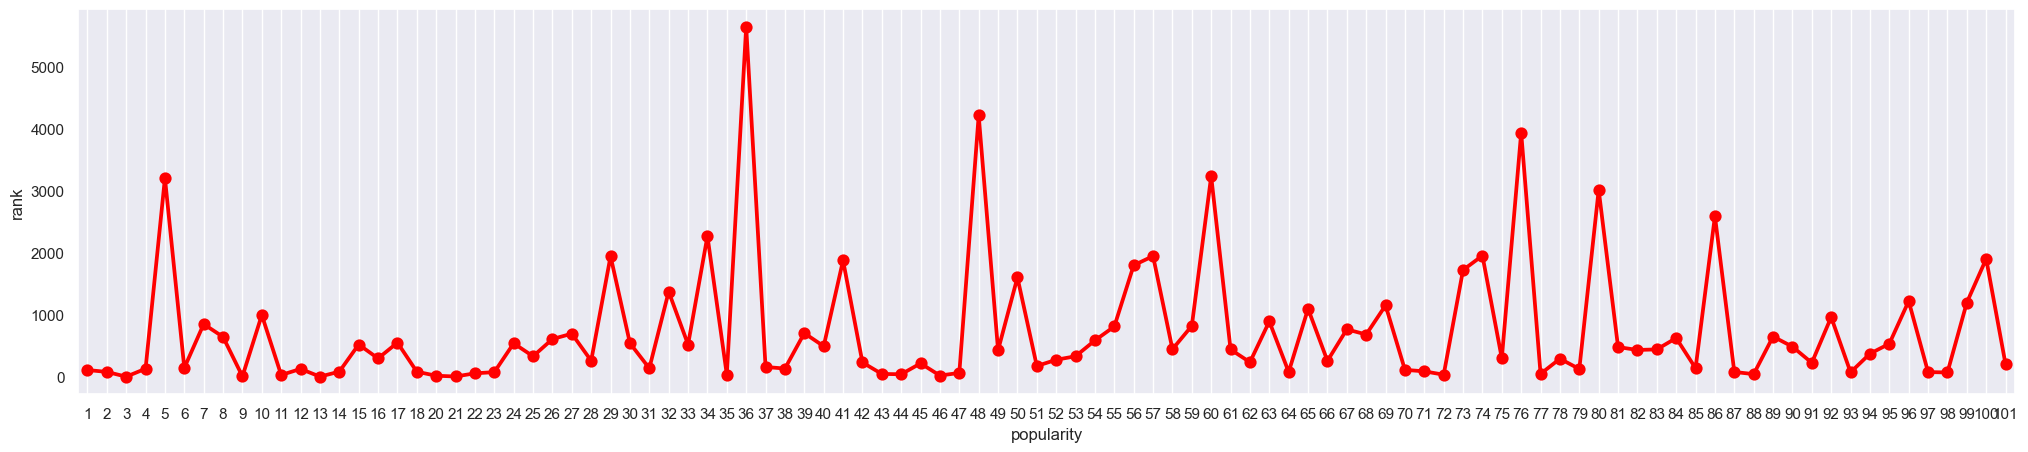

In [ ]:
#plot the top 100 most popular anime against it rank
f,ax1 = plt.subplots(figsize =(25,5))
sb.pointplot(x='popularity',y='rank',data=anime_most_pop,color='red')
plt.grid()

we can see that there is one anime where it popularity and rank deviate alot, let check it out

In [ ]:
anime_most_pop[anime_most_pop["popularity"]==36]

,title_x,popularity,rank
6730,Sword Art Online II,36,5638.0


**Analysis**:

We can see that the anime **Sword Art Online II** has a high popularity but very low rank among all these anime. This shows that an anime that are popular might not correlate to them having a good rank or good score

# 8. Correlation (Heat Map)

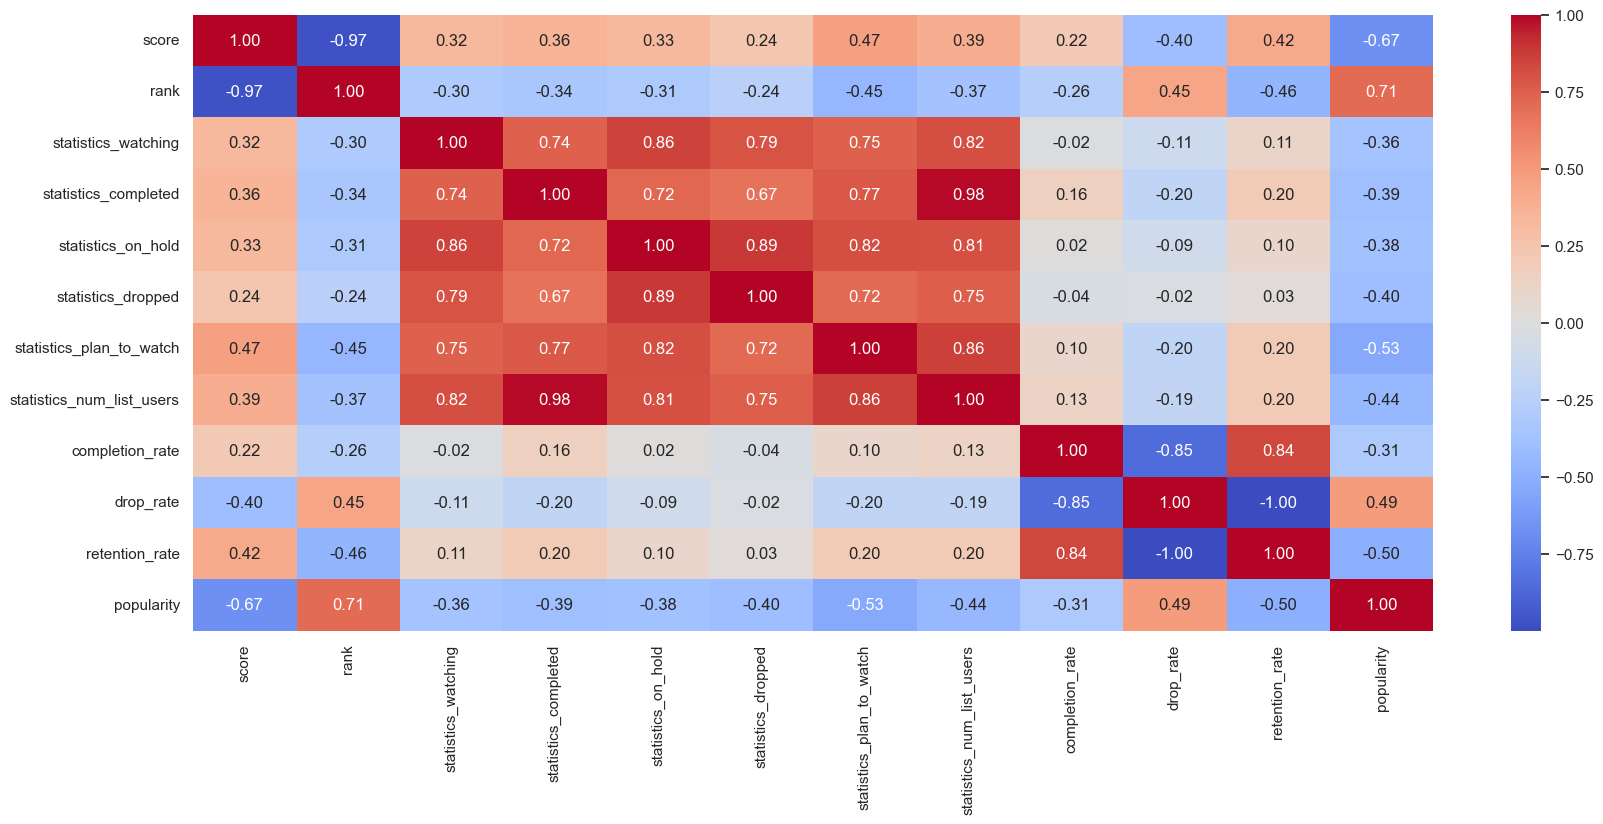

In [ ]:
# Select the desired columns for the correlation matrix
selected_columns = ['score','rank','statistics_watching','statistics_completed',
                    'statistics_on_hold','statistics_dropped','statistics_plan_to_watch',
                    'statistics_num_list_users','completion_rate','drop_rate','retention_rate', 'popularity']

# Compute the correlation matrix
correlation_matrix = anime_clean[selected_columns].corr()

# Set the size of the plot
plt.figure(figsize=(20, 8))

# Generate the heatmap
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Show the plot
plt.show()

# **Summary for EDA**

### 1. Genre

### 7. Top Anime (According to Rank and Popularity)
- **Quantity vs. Quality:** From the data visualization and analysis, it was observed that Toei Animation, known for its prolific output, produces the most number of anime titles. However, despite this high production rate, Toei Animation does not appear prominently in the list of top anime rankings. This suggests that merely producing a large volume of anime does not guarantee that these titles will be critically successful or widely acclaimed.

    In contrast, Wit Studio, known for a significantly lower volume of productions, has achieved remarkable success and recognition in the industry. Wit Studio's works frequently appear at the top of anime rankings, suggesting a focus on quality over quantity. This observation underscores the importance of production quality as a critical factor in achieving recognition and success in the anime market.

### 8. Top 100 Most Popular Anime (Only according to Popularity)
- **Popularity and Ranking:** We found out that to determine an anime being successful, we cannot just look solely at their ranking or popularity only. As we can see the anime **Sword Art Online II**, although it has a high popularity, but the ranking is very bad. Meaning a popular anime can still be a relatively bad anime.

 